# Взаимоотношение между кол-ми и категорийными переменными

Выявление взаиомоотношений между переменными может дать нам ключевые знания заключенные в данных.

Для наглядного представления важности выявления данных взаимоотношений воспользуемся ранее созданным набором students.csv

In [3]:
# Давайте попробуем определить есть ли зависимость между финальной оценкой по математике и локацией где живут студенты
# Для начала выдели два набора в каждом из которой будут находится студенты которые живут в пригороде или в городе
import pandas as pd

students = pd.read_csv('./files/students.csv')

print(students.head(), end='\n\n')

rural = students[students.address == 'R'].reset_index(drop=True)
urban = students[students.address == 'U'].reset_index(drop=True)

print(rural.head(), urban.head(), sep='\n\n')

  address  absences     Mjob      Fjob  math_grade
0       U         6  at_home   teacher           6
1       U         4  at_home     other           6
2       U        10  at_home     other          10
3       U         2   health  services          15
4       U         4    other     other          10

  address  absences      Mjob     Fjob  math_grade
0       R         2  services   health           8
1       R         0   teacher  at_home          16
2       R         7     other  teacher          15
3       R         2  services   health          11
4       R         8   at_home    other          13

  address  absences     Mjob      Fjob  math_grade
0       U         6  at_home   teacher           6
1       U         4  at_home     other           6
2       U        10  at_home     other          10
3       U         2   health  services          15
4       U         4    other     other          10


In [4]:
# давайте рассчитаем среднее значение оценки студентов из каждой локации
urban_mean_score = urban.math_grade.mean()
rural_mean_score = rural.math_grade.mean()

# рассчитаем медиану
urban_median_score = urban.math_grade.median()
rural_median_score = rural.math_grade.median()

# выведем значение на экран
print(urban_mean_score, urban_median_score)
print(rural_mean_score, rural_median_score)

10.674267100977199 11.0
9.511363636363637 10.0


In [6]:
# большая ли разница между показателями средних значений
print(urban_mean_score - rural_mean_score)

# а между медианными значениями
print(urban_median_score - rural_median_score)

1.1629034646135619
1.0


Как можно заметить разница не велика

## Сравнительная визуализация

Для того чтобы сравнить показатели двух переменных между собой используется Side-by-side boxplot он вызывается тем же методом что и раньше но с добавлением дополнительных параметров

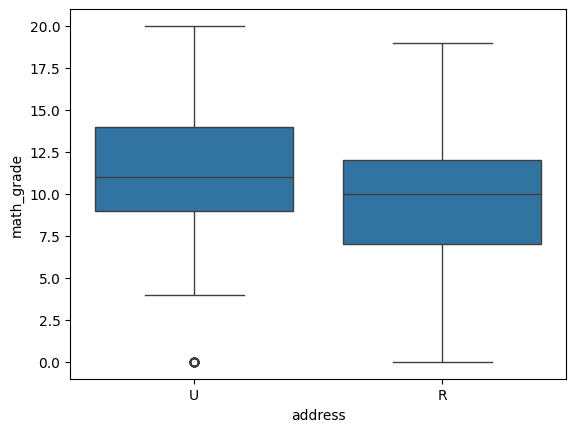

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# визуализируем значения вычисленные раннее
sns.boxplot(data=students, x='address', y='math_grade')
plt.show()
plt.close()

По мимо использования side-by-side boxplot

Также применяются overlaping histogram

В обоих случаях чем больше пересечений значений между показателями тем более зависимым являются переменные между собой в данном случае адресс и средняя оценка по математике

Но в отличии от boxplot hist вызывает каждый график по отдельности и добавляет в общую рабочую поверхность

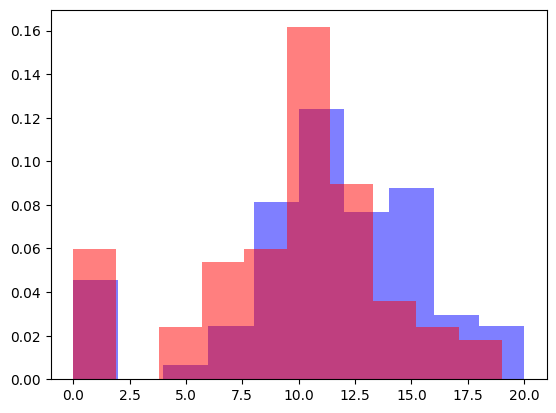

In [13]:
# визуализируем данные с использованием hist
plt.hist(urban.math_grade, color='blue', label='Urban', alpha=.5, density=True)
plt.hist(rural.math_grade, color='red', label='Rural', alpha=.5, density=True)
plt.show()
plt.close()

В данном случае используется методы pyplot не seaborn для добавления нескольких гистограм на график

параметры density и alpha отвечает за масштабирование и прозрачность соответственно

## Исследование не бинарных категорийных переменных

side-by-side boxplot также можно применить к не бинарным категорийным

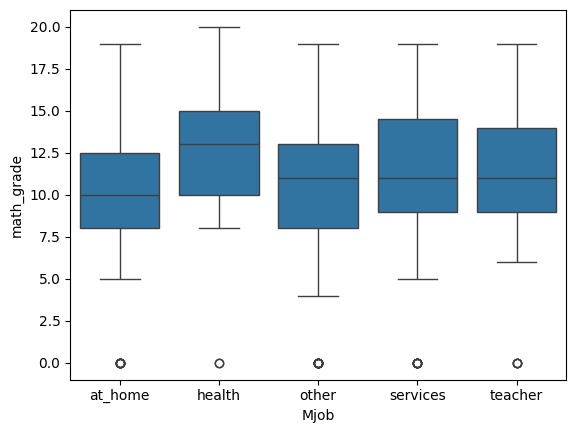

In [14]:
sns.boxplot(data=students, x='Mjob', y='math_grade')
plt.show()
plt.close()